# Data Loading

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
from scipy import stats
import matplotlib.pyplot as pl
%matplotlib inline
file = pd.read_csv("ks-projects-201801.csv", error_bad_lines = False) # mengambil file csv menggunakan pandas
file.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


# Preprocessing

In [2]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [3]:
file.describe() # data loading

,ID,goal,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real
count,3.786610e+05,3.786610e+05,3.786610e+05,378661.000000,3.748640e+05,3.786610e+05,3.786610e+05
mean,1.074731e+09,4.908079e+04,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04
std,6.190862e+08,1.183391e+06,9.563601e+04,907.185035,7.863975e+04,9.097334e+04,1.152950e+06
min,5.971000e+03,1.000000e-02,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02
25%,5.382635e+08,2.000000e+03,3.000000e+01,2.000000,1.698000e+01,3.100000e+01,2.000000e+03
50%,1.075276e+09,5.200000e+03,6.200000e+02,12.000000,3.947200e+02,6.243300e+02,5.500000e+03
75%,1.610149e+09,1.600000e+04,4.076000e+03,56.000000,3.034090e+03,4.050000e+03,1.550000e+04
max,2.147476e+09,1.000000e+08,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08


# Measure of Central

In [14]:
col = ["goal","pledged","backers","usd pledged","usd_pledged_real","usd_goal_real"]

In [15]:
for i in col:
    print("Mean dari",i,":",file[i].mean())# mengambil nilai mean

Mean dari goal : 49080.79152056854
Mean dari pledged : 9682.97933946224
Mean dari backers : 105.61747578969052
Mean dari usd pledged : 7036.728867109212
Mean dari usd_pledged_real : 9058.924074119337
Mean dari usd_goal_real : 45454.40146545336


In [16]:
for i in col:
    print("Median dari",i,":",file[i].median())# mengambil nilai tengah/median

Median dari goal : 5200.0
Median dari pledged : 620.0
Median dari backers : 12.0
Median dari usd pledged : 394.72
Median dari usd_pledged_real : 624.33
Median dari usd_goal_real : 5500.0


In [17]:
for i in col:
    print("Modus dari",i,":",file[i].mode())mengambil nilai yang sering muncul

Modus dari goal : 0    5000.0
dtype: float64
Modus dari pledged : 0    0.0
dtype: float64
Modus dari backers : 0    0
dtype: int64
Modus dari usd pledged : 0    0.0
dtype: float64
Modus dari usd_pledged_real : 0    0.0
dtype: float64
Modus dari usd_goal_real : 0    5000.0
dtype: float64


# Measure of Variance

In [20]:
for i in col:
    print(i ,"range:",(file[i].max()-file[i].min()))# melihat nilai range

goal range: 99999999.99
pledged range: 20338986.27
backers range: 219382
usd pledged range: 20338986.27
usd_pledged_real range: 20338986.27
usd_goal_real range: 166361390.70000002


In [21]:
for i in col:
    print("Nilai variance dari",i,":",file[i].var())# mengambil nilai variance

Nilai variance dari goal : 1400414872097.0361
Nilai variance dari pledged : 9146246409.673967
Nilai variance dari backers : 822984.6873539966
Nilai variance dari usd pledged : 6184209542.154368
Nilai variance dari usd_pledged_real : 8276149156.121636
Nilai variance dari usd_goal_real : 1329293829528.3057


In [23]:
for i in col:
    print("Nilai std dari",i,":",file[i].std())

Nilai std dari goal : 1183391.2590927128
Nilai std dari pledged : 95636.01000498697
Nilai std dari backers : 907.1850347938928
Nilai std dari usd pledged : 78639.74530830048
Nilai std dari usd_pledged_real : 90973.34310731708
Nilai std dari usd_goal_real : 1152950.0550883831


# Confidence Intervals

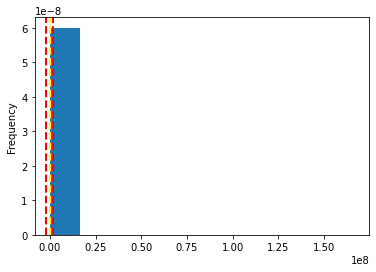

90% Confidence Interval:  (-1850979.678340574, 1941888.4812714802)


In [37]:
samples = file["usd_goal_real"]
m = samples.mean()
sd = samples.std()
ci = stats.norm.interval(0.90,m,sd)

samples.plot.hist(samples,bins= 10,density=True)
pl.axvline(m, color= "yellow",linestyle= "dashed",linewidth= 2)
pl.axvline(ci[0], color= "red",linestyle= "dashed",linewidth= 2)
pl.axvline(ci[1], color= "red",linestyle= "dashed",linewidth= 2)
pl.show()
print("90% Confidence Interval: ",ci)

# Hypothesis Testing

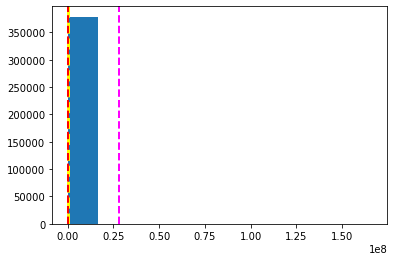

In [25]:
sample = file["usd_goal_real"]
t,p = stats.ttest_1samp(sample,0)
ci = stats.norm.interval(0.90,0,1.15)
pl.hist(sample)
pl.axvline(sample.mean(), color= "yellow",linestyle= "dashed",linewidth= 3)
pl.axvline(ci[0], color= "red",linestyle= "dashed",linewidth= 2)
pl.axvline(sample.mean()+t*sample.std(), color= "magenta",linestyle= "dashed",linewidth= 2)
pl.show()

In [48]:
x = pd.crosstab(file["main_category"], file["currency"])
chisq, pvalue, df, expected = stats.chi2_contingency(x)
print(f'Observed chi2: {chisq:.2f}')
print(f'P-value: {pvalue:.4f}')
x

Observed chi2: 15148.82
P-value: 0.0000


currency,AUD,CAD,CHF,DKK,EUR,GBP,HKD,JPY,MXN,NOK,NZD,SEK,SGD,USD
main_category,,,,,,,,,,,,,,
Art,425,1067,48,89,1083,2667,34,2,160,34,91,112,30,22311
Comics,188,521,6,15,204,867,8,0,35,17,16,25,7,8910
Crafts,183,426,22,33,391,904,12,0,63,17,43,37,30,6648
Dance,32,94,4,3,78,280,1,0,24,7,8,7,1,3229
Design,929,1500,132,175,2054,2706,236,8,108,62,157,172,140,21691
Fashion,717,1060,65,77,1435,2372,45,8,76,41,101,128,104,16587
Film & Video,973,1760,57,114,1407,5894,10,1,317,78,196,207,16,52555
Food,477,1047,50,60,991,1649,10,0,102,48,100,103,23,19942
Games,961,1884,65,105,2728,4013,76,10,148,85,183,275,59,24639
